In [172]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.model_selection import train_test_split

# Notes

#### zhvi  (zillow home value index)

Time series is generate forecast for future values of ZHVI 
forecasting special case of predicting future values as accurately as possible based on past values
* How well we understand factors that contribute. to things we are trying to predict ?

Time series data usually collected over monthly , so not alot of data points in general


1.  inventory
2.  supply-demand
3. is act of predicting  zhvi affects  this ? ( forecast-> humans react-> inturn affects forecast)
Linear model
Arima model - base line model for time series,flexible
long term trend and sudden shocks
easily extended to -
* seasonal arima ,
* Arima with Exogenous predictors with independent x variables
* vector ARIMA models
auto regressive + integrated+ moving average (explains sudden shock)
self regression   - corelation between. same  variable and  itself
exponential smoothing model,regressing Y on itself
Recurrent neural networks ( RNN) - suitable for sequence data
hyper parameter
p - how many previous Y I  want to put in my model
q - How many previous errors I want to put in my model
d-differencing paramter - how much do we difference time series by.
AIC -

In [ ]:
df =  pd.read_csv("./Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_month.csv")
df.head()

In [ ]:
#df['StateName'].value_counts()

In [ ]:
df =df[df['RegionName'] =='Denver, CO' ]

In [ ]:
df
df.dtypes

In [ ]:
## transforming the columns to rows for date column
df =df.melt(id_vars=["RegionID", "SizeRank", "RegionName","RegionType","StateName"], 
    var_name="Month", 
    value_name="zhvi")

In [ ]:
df.head()

In [ ]:
# converting the Month column datatype from object to datetime
df["Month"] =pd.to_datetime(df["Month"])

In [ ]:
df.set_index('Month',inplace =True )

In [ ]:
df.index.min(),df.index.max()

In [ ]:
df.sort_index(inplace =True)

In [ ]:
df['2018']

In [ ]:
# rolling mean is mean of moving windoes  across time periods
#df.rolling(3).mean()

In [ ]:
#step. 3 :  lets. create timeplot to inspect manually trend, seasonality
plt.figure(figsize=(12,8))
plt.plot(df['zhvi'],label= 'zhvi')
#plt.plot(df['zhvi'].rolling(12).mean(),label= 'zhvi mean for year')
plt.legend()

#. stationarity ? - statistical properties of data should not change with time 
-dicky- fuller test tells you if the data is stationary.
If our time series is stationary, then we do not need to difference
which means  the  series should not have trend
If our series is not stationary we diff it once or twice and then model it.
One way to check no stationarity is check is the diff looks like noise.

In [ ]:
#plt.plot(df['zhvi'])
plt.plot(df['zhvi'].diff()) #. diffing once , we still see upward trend so lets diff again
plt.plot(df['zhvi'].diff().diff())
#plt.plot(df['zhvi'].diff().diff())

In [ ]:
linear regression model  with time series data
identify trend -  Long term  increase or decrase in. data ( linear , exponential)
sesonality- affected by factors that take on a fixed and known frequency
(examples - consumer spending/retail sale - halloween , swim ware , gym membership , agriculture,resturant sale)
autoco-relation and partial auto co-relation plot

In [ ]:
#step 4: decompose time series in to  trend ,seasonal and  residual components
decomp =seasonal_decompose(df['zhvi']) # ,model ='multiplicative')
decomp.plot();

In [ ]:
decomp.seasonal

In [167]:
# auotp-corelation - corelation of the variable with lagged version of itself
df['zhvi_lag1'] = df['zhvi'].shift()
df['zhvi_lag2'] = df['zhvi'].shift().shift()
df['zhvi_lag3'] = df['zhvi'].shift().shift().shift()

In [168]:
df.tail()

,zhvi,zhvi_lag13,zhvi_lag1,zhvi_lag2,zhvi_lag3
Month,,,,,
2021-02-28,506159.498560,452616.041153,496996.113987,489883.464574,483522.347657
2021-03-31,515529.039213,453786.470495,506159.498560,496996.113987,489883.464574
2021-04-30,526986.194323,457425.940656,515529.039213,506159.498560,496996.113987
2021-05-31,543624.512488,460707.946654,526986.194323,515529.039213,506159.498560
2021-06-30,557101.229867,460252.990289,543624.512488,526986.194323,515529.039213


In [165]:
df =df.drop(columns= ['RegionID','SizeRank','RegionName','RegionType','StateName'])

In [166]:
df.tail()

,zhvi,zhvi_lag13
Month,,
2021-02-28,506159.498560,452616.041153
2021-03-31,515529.039213,453786.470495
2021-04-30,526986.194323,457425.940656
2021-05-31,543624.512488,460707.946654
2021-06-30,557101.229867,460252.990289


In [94]:
df.corr()

,zhvi,zhvi_lag1,zhvi_lag2,zhvi_lag3
zhvi,1.000000,0.999777,0.999221,0.998439
zhvi_lag1,0.999777,1.000000,0.999788,0.999300
zhvi_lag2,0.999221,0.999788,1.000000,0.999817
zhvi_lag3,0.998439,0.999300,0.999817,1.000000


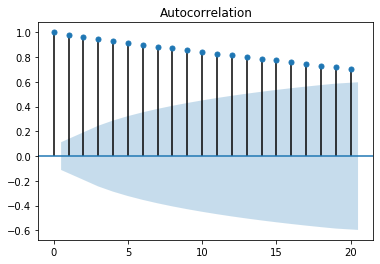

In [99]:
#auto corelation plot  for 20 lags period
plot_acf(df['zhvi'],lags=20);

#whats lags do I want to put in linear regression? - 20 variables  as input ?
(multicolianrity - Yt co-related with Yt-1 , 
20 data points -overfitting, 
when we introduced lag of 20 , introduced 20 NAs, rendering these unusable. we usually collect monthly, yearly -  so we will be getting rid of  20 months/years worth of data.
Partial auto corelation is a tweaked  co-relation  between
how much additional stuff yt-2 gives us inaddition to Yt-1

/Users/mybiyani/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


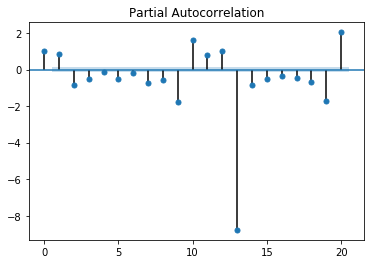

In [139]:
plot_pacf(decomp.seasonal,lags=20);

In [154]:
df['zhvi_lag13'] = df['zhvi'].shift(13)

ARIMA(p,d,q )- auto regression + integration + moving average
p-how many lags
d-  how many times you diff to get the data stationary
q -persion of moving average

In [174]:
df.tail()

,zhvi,zhvi_lag13,zhvi_lag1,zhvi_lag2,zhvi_lag3
Month,,,,,
2021-02-28,506159.498560,452616.041153,496996.113987,489883.464574,483522.347657
2021-03-31,515529.039213,453786.470495,506159.498560,496996.113987,489883.464574
2021-04-30,526986.194323,457425.940656,515529.039213,506159.498560,496996.113987
2021-05-31,543624.512488,460707.946654,526986.194323,515529.039213,506159.498560
2021-06-30,557101.229867,460252.990289,543624.512488,526986.194323,515529.039213


train- test -split
training set - first 80% data
testing set - last 20 % data

In [186]:
X_train,X_test, y_train ,y_test = train_test_split(df.drop(columns= "zhvi"),df["zhvi"],test_size=0.2,shuffle =False)

In [187]:
print(X_train.shape)
print(X_test.shape)
print(x_train.shape)
print(x_test.shape)

(244, 4)
(62, 4)
(244, 4)
(62, 4)


In [188]:
import statsmodels.api as sm
X_train =sm.add_constant(X_train)
X_test =sm.add_constant(X_test)

/Users/mybiyani/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [194]:
X_train.dropna(inplace =True)
y_train =y_train[X_train.index]
lm= sm.OLS(y_train,X_train)
lm_results=lm.fit()
print(lm_results.summary())
##### we   dont care of  inference so much

In [203]:
X_train.index

DatetimeIndex(['1997-02-28', '1997-03-31', '1997-04-30', '1997-05-31',
               '1997-06-30', '1997-07-31', '1997-08-31', '1997-09-30',
               '1997-10-31', '1997-11-30',
               ...
               '2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31',
               '2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29',
               '2016-03-31', '2016-04-30'],
              dtype='datetime64[ns]', name='Month', length=231, freq=None)

In [207]:
y_pred=lm_results.predict(X_test)

In [204]:
from sklearn.metrics import r2_score, mean_squared_error

In [208]:
r2_score(y_test,y_pred)
# 99% of variability is explained by model, doesn't mean will. always hold  true
# if something like 9/11, covid can change that

0.9975928735132625

In [220]:
mean_squared_error(y_test,y_pred) ** 0.5
#  on avg  how off far. away we are from our predicted results  from actual result

2056.2407252547946

(array([100000., 150000., 200000., 250000., 300000., 350000., 400000.,
        450000., 500000., 550000., 600000.]),
 <a list of 11 Text yticklabel objects>)

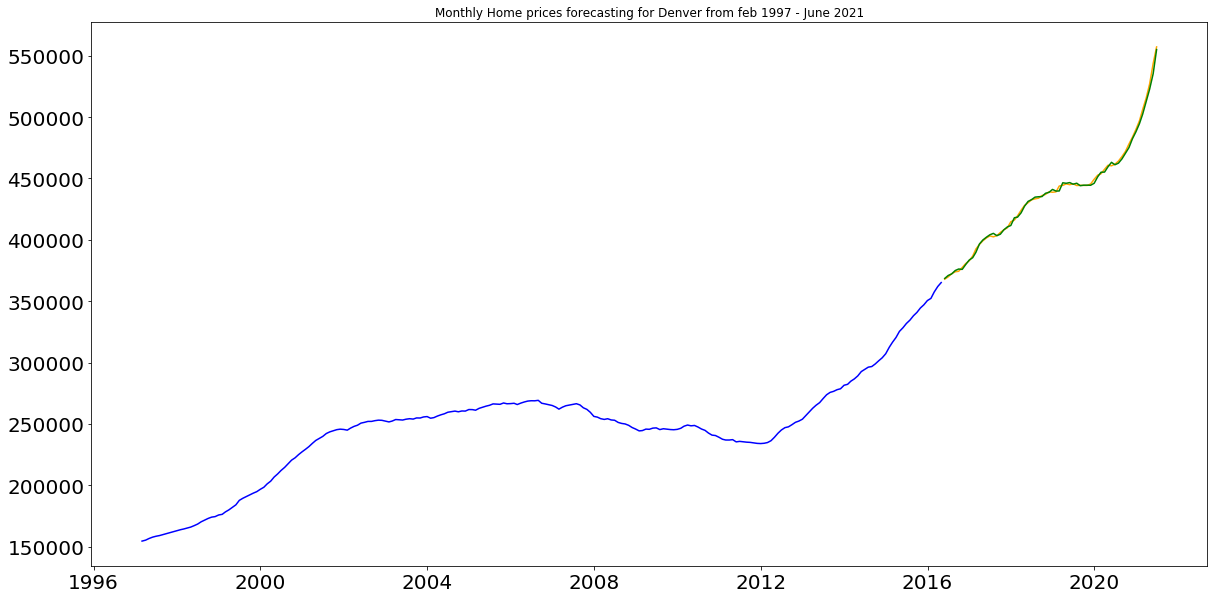

In [221]:
plt.figure(figsize=(20,10))
plt.plot(y_train.index,y_train.values,color= 'blue')
plt.plot(y_test.index,y_test.values,color= 'orange')
plt.plot(y_pred.index,y_pred.values,color= 'Green')
plt.title(label = 'Monthly Home prices forecasting for Denver from feb 1997 - June 2021')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [225]:
df["first_diff_zhvi"] = df["zhvi"].diff(1)
df["first_diff_zhvi"] = df["zhvi"].diff(1).diff(1)
df.head()

,zhvi,zhvi_lag13,zhvi_lag1,zhvi_lag2,zhvi_lag3,first_diff_zhvi
Month,,,,,,
1996-01-31,146471.157108,NaN,NaN,NaN,NaN,NaN
1996-02-29,147445.505164,NaN,146471.157108,NaN,NaN,NaN
1996-03-31,148167.249693,NaN,147445.505164,146471.157108,NaN,-252.603527
1996-04-30,148930.142613,NaN,148167.249693,147445.505164,146471.157108,41.148391
1996-05-31,149767.491533,NaN,148930.142613,148167.249693,147445.505164,74.455999


Requirement for ARIMA model -  The data needs to be stationary - no systematic changes in the the data , that means. no trend and no seasonality

In [ ]:
augmented dicky fuller test -